In [1]:
import bisect
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

<br>

# Sampling form a distribution
---

We have a random generator of number in uniform distribution $U(0,1)$ and we want to be able to model any distribution $p(y)$ such as gaussians, exponential distributions or discrete distribution. How can we do it?

<br>

### The intuition

The **cumulative density function** $C$ of a distribution $p(y)$ indicates what is the **probablity that the value takes a value below or equal to $y$**:

&emsp; $C(y) = \int_{-\infty}^{y} p(y) dy : \mathbb{R} \rightarrow [0,1]$
&emsp; $\implies$
&emsp; $C(y) = \int_{-\infty}^{\infty} p(y) dy = 1$
&emsp; $and$
&emsp; $\displaystyle p(y) = \frac{d}{dy} C(y)$

The CDF is a function that returns a results between O and 1. The value of the CDF changes rapidely when the probability density $p$ has a high value (since it is the derivate of the CDF). The CDF is also monotonously increasing.

So if we pick a number $z \sim U(0,1)$ from the codomain of $C$, and find the $y$ in the domain of $C$ such that $C(y) = z$, we have a higher change of falling on $y$ for which $p(y)$ is high. This phenomena is illustrated below:

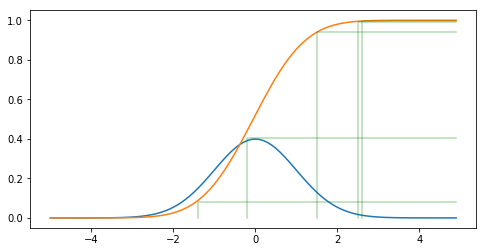

In [2]:
dy = 0.1
ys = np.arange(-5., 5., dy)
ps = np.exp(- ys ** 2 / 2) / math.sqrt(2 * math.pi)
cs = np.cumsum(ps) * dy

plt.figure(figsize=(8,4))
plt.plot(ys, ps)
plt.plot(ys, cs)
for z in np.random.uniform(0., 1., size=5):
    y = ys[bisect.bisect_left(cs, z)]
    plt.plot([y,y,np.max(ys)],[0,z,z], color='green', alpha=0.3)
plt.show()

<br>

### The technique

To sample a $y$, we therefore sample a $z \sim U(0,1)$, and then solve:

&emsp; $C(y) = z$
&emsp; $\implies$
&emsp; $y = C_y^{-1}(z)$
&emsp; where
&emsp; $C_y$ is the cumulative distribution function of $y$

This formula can be generalized by observing that if we pose $z = C_y(y)$, the derivative of $C(y)$ is $dz/dy$ which is also equal to $p(y)$ by definition of the cumulative distribution function. So if we have two distributions $p(x)$ and $p(y)$ we can write:

&emsp; $\displaystyle \frac{dz}{dy} = p(y)$
&emsp; and
&emsp; $\displaystyle \frac{dz}{dx} = p(x)$
&emsp; $\implies$
&emsp; $dz = p(y) dy = p(x) dx$
&emsp; $\implies$
&emsp; $\displaystyle p(y) = p(x) \frac{dx}{dy}$

So if we know how the density function $p(x)$ and we know how to express $y$ as a function of $x$, such that $y = f(x)$, we can deduce the distribution of $y$. Similarly, if we know how to sample $x$, we can also sample $y$. The formulas are summarized below:

&emsp; $y = f(x)$
&emsp; $\implies$
&emsp; $\displaystyle \boxed{p(y) = p(x) \frac{dx}{dy}}$
&emsp; and
&emsp; $\text{to sample }y, \boxed{\text{sample }x \sim p(x)\text{ and apply }y = C_y^{-1}(C_x(x))}$

This technique works as long as you can efficiently reverse the cumulative density function.

<br>

### Mathematical derivation

We have a look at the cumulative distribution functions of $x$ and $y$, and look for points where there match:

&emsp; $\displaystyle z = C_y(y) = C_x(x) = \int_{-\infty}^y p(y) dy = \int_{-\infty}^x p(x) dx$

We use the change of variable $y = f(x)$:

&emsp; $\displaystyle \int_{-\infty}^{f(x)} p(f(x)) \frac{dy}{dx} dx = \int_{-\infty}^x p(x) dx$
&emsp; $\displaystyle \overset{\textstyle \frac{d}{dx}}{\longrightarrow}$
&emsp; $\displaystyle p(y) \frac{dy}{dx} = p(x)$

<br>

### Examples

We want to sample elements from $y \sim U(1,3)$:

&emsp; $\displaystyle p(y) = \frac{1}{2}$
&emsp; $\implies$
&emsp; $\displaystyle C(y) = \int_1^y \frac{1}{2} dy = \frac{1}{2}(y-1)$
&emsp; $\implies$
&emsp; $\displaystyle \frac{1}{2}(y-1) = z$
&emsp; $\implies$
&emsp; $y = 2 z + 1$

We want to sample elements from $t \sim exp(\lambda)$:

&emsp; $\displaystyle p(t) = \lambda^{- \lambda t}$
&emsp; $\implies$
&emsp; $\displaystyle C(t) = \int_{-\infty}^t \lambda e^{-\lambda t} dt = \big[ -e^{-\lambda t} \big]_{-\infty}^t = 1 - e^{-\lambda t} = z$
&emsp; $\implies$
&emsp; $\displaystyle t = - \frac{\log (1 - z)}{\lambda}$

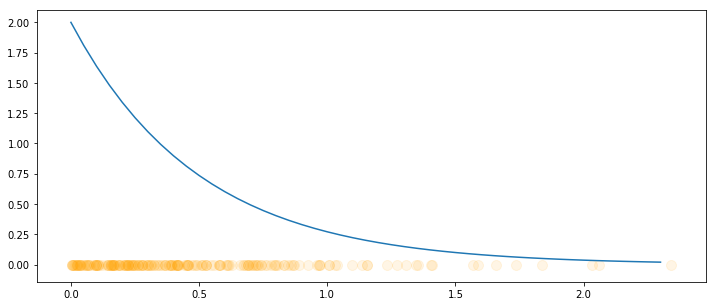

In [3]:
def sample_exp(lam: float, size: int):
    zs = np.random.uniform(0., 1., size=size)
    return - np.log(1 - zs) / lam

samples = sample_exp(2., 200)
ts = np.arange(0., np.max(samples), 0.05)

plt.figure(figsize=(12,5))
plt.plot(ts, 2. * np.exp(-2. * ts))
plt.scatter(samples, [0]*len(samples),s=100, alpha=0.1, color='orange')
plt.show()

<br>

# Ancestral sampling
---

Bayesian networks and stuff

<br>

# Sampling with observed variables
---